In [13]:
import tensorflow as tf
import numpy as np
from tablenet import TableNet
from tablenet.util import decode_image, display_image_and_masks

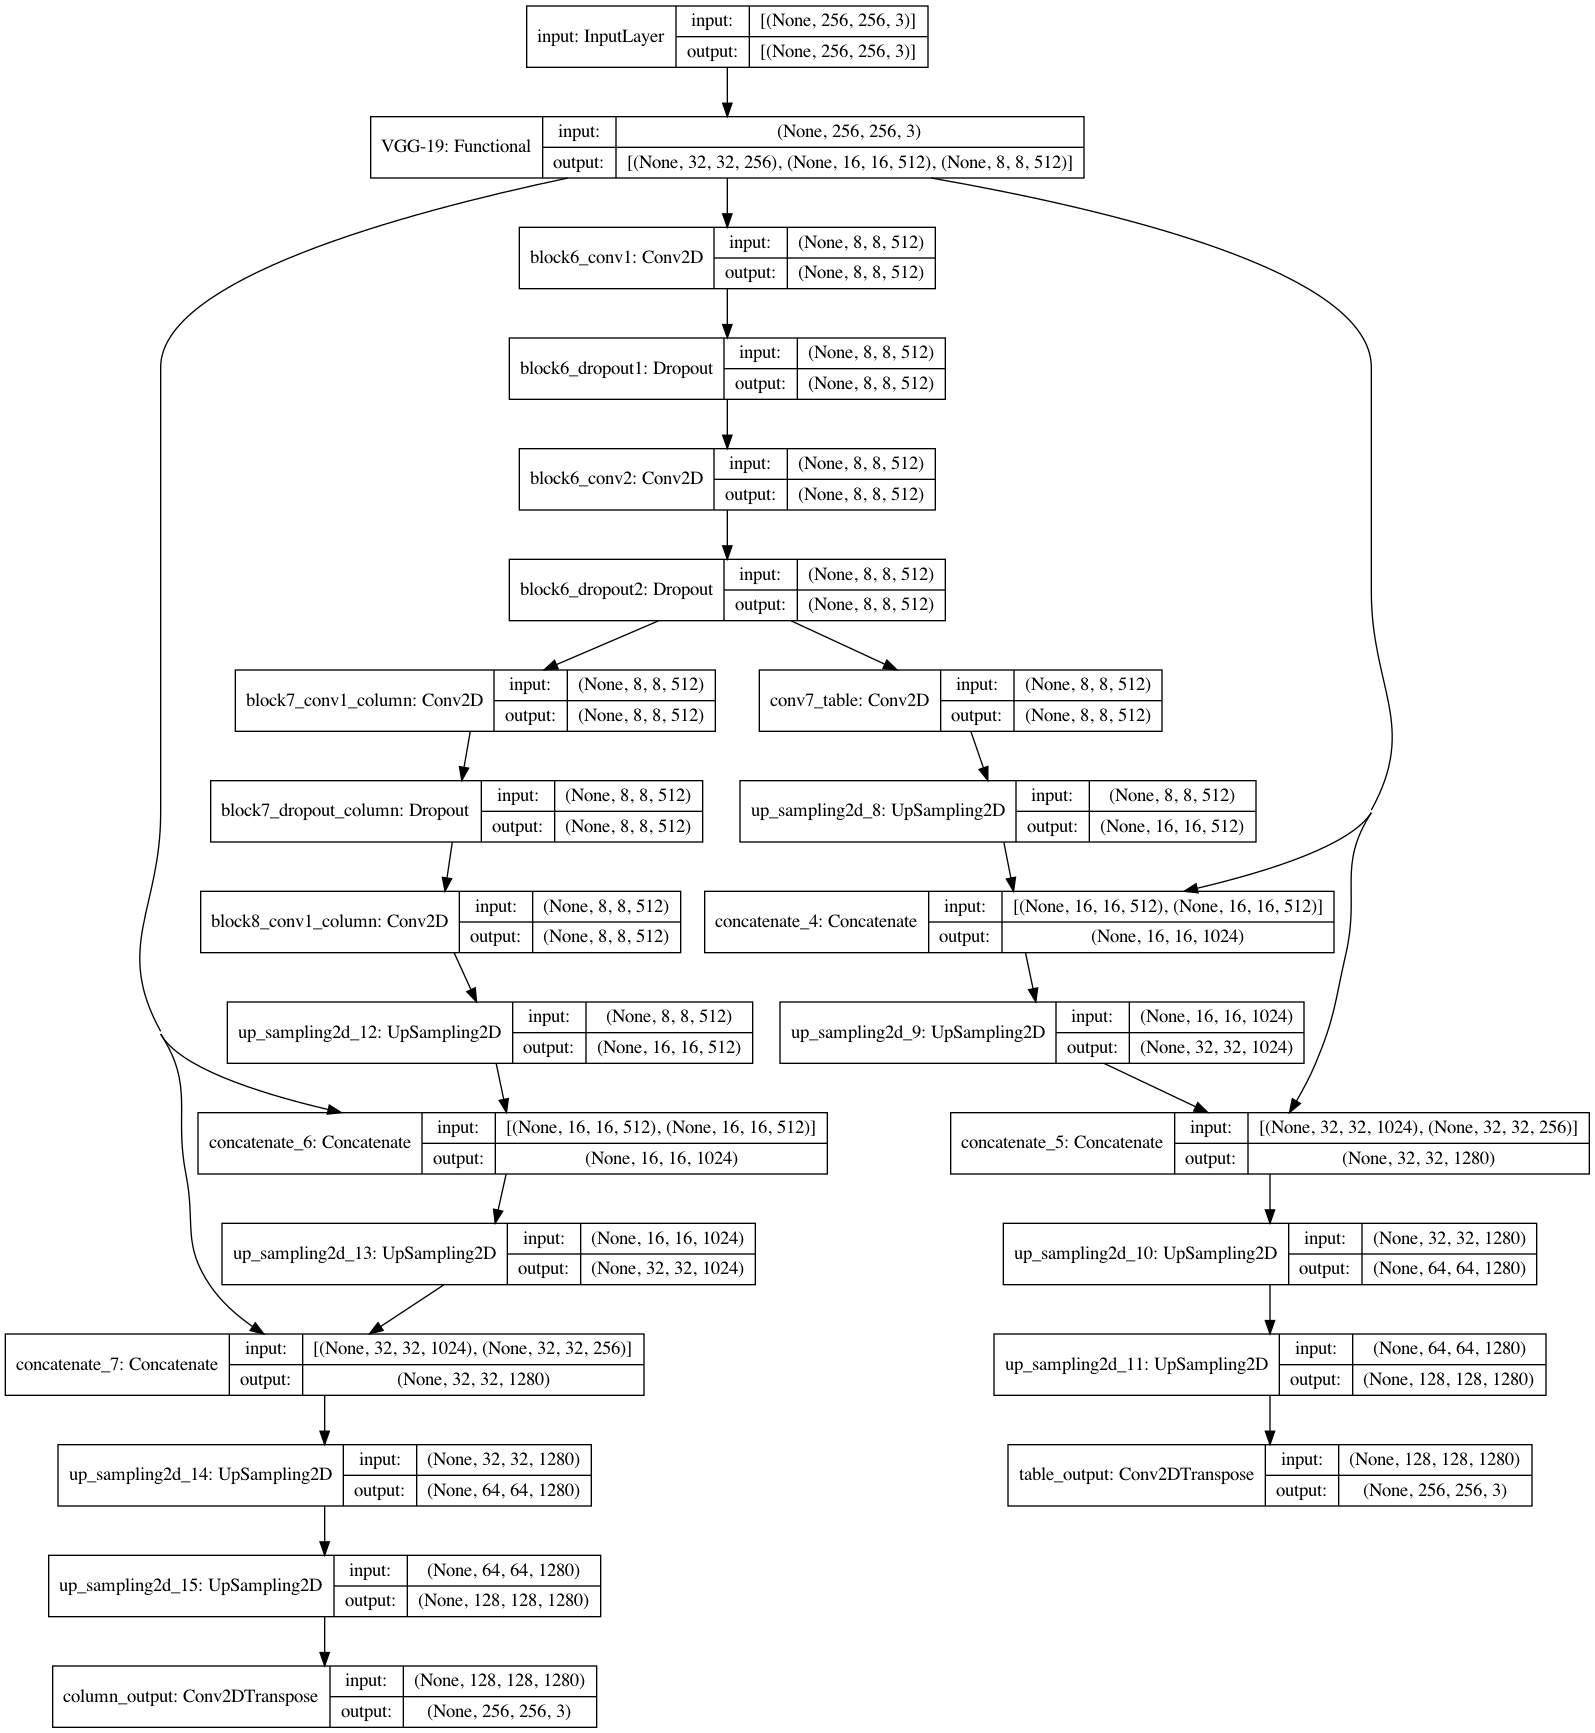

In [14]:
model = tf.keras.models.load_model('saved_model')
tf.keras.utils.plot_model(model, show_shapes=True)

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


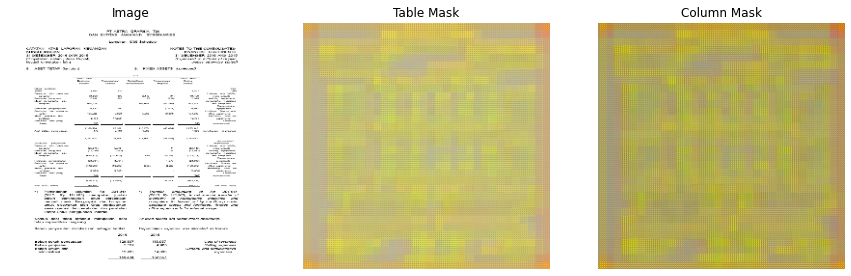

In [19]:
image_file = tf.io.read_file('/Users/sky/Desktop/asgr-depreciation.png')
image = np.reshape(decode_image(image_file), (1, 256, 256, 3))
table_mask, column_mask = model.predict(image)
print(image.shape)
print(table_mask.shape)
print(column_mask.shape)
display_image_and_masks(image[0], table_mask[0], column_mask[0])